In [21]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torchinfo
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sympy as sp
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from nltk import sent_tokenize
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
#from imblearn.over_sampling import SMOTE
import math
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingClassifier
#from xgboost import XGBClassifier,XGBRegressor,XGBRFRegressor,XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,r2_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.datasets import make_regression,make_classification
from sklearn.linear_model import SGDRegressor,SGDClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.utils import resample
from sklearn.feature_selection import VarianceThreshold 
from sklearn.feature_selection import SelectKBest,chi2 ,SelectPercentile,f_classif,mutual_info_classif,VarianceThreshold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#from mlxtend.plotting import plot_decision_regions
from sklearn.dummy import DummyClassifier,DummyRegressor
#from imblearn.over_sampling import SMOTE
#from imblearn.ensemble import BalancedRandomForestClassifier,BalancedBaggingClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import re
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SequentialFeatureSelector
import statsmodels.api as sm
import sympy as sp
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor,SGDClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import math
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,r2_score,classification_report,confusion_matrix
from sklearn.datasets import make_regression,make_classification
from sklearn.linear_model import SGDRegressor,SGDClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder,Normalizer,MinMaxScaler,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.utils import resample
from sklearn.feature_selection import SelectPercentile,SelectKBest,chi2,f_classif,mutual_info_regression,mutual_info_classif,VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_diabetes,load_breast_cancer,load_iris
import nltk
from nltk.stem import PorterStemmer,SnowballStemmer
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import StackingClassifier,StackingRegressor
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")  # Correct way to ignore warnings
import optuna
from torch.utils.data import Dataset, DataLoader

## Objective : To classify the text from multiple images which are grouped under multiple classes

In [2]:
# read the files containing the text
import os

def read_and_group_data(root_folder):
    """
    Reads text files from subfolders within a root folder.
    Groups files by folder name (class label).
    
    Args:
        root_folder (str): Path to the root folder containing subfolders.
    
    Returns:
        dict: Keys are class labels (folder names), values are lists of file contents.
    """
    grouped_data = {}  # Dictionary to hold class-wise grouped data
    
    # Iterate through all folders in the root folder
    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        
        # Check if the item is a folder (class label)
        if os.path.isdir(class_path):
            grouped_data[class_folder] = []  # Initialize a list for the class
            
            # Iterate through all text files in the folder
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                
                # Read the content of each text file
                if file_name.endswith('.txt'):  # Ensure only .txt files are read
                    with open(file_path, 'r', encoding='utf-8') as file:
                        file_content = file.read()
                        grouped_data[class_folder].append(file_content)
    
    return grouped_data

# Example Usage
root_folder = "D:\Machine_learning\mltest\ML\data\ocr"  # Replace with your actual folder path
data = read_and_group_data(root_folder)

# Print grouped data summary
for class_label, files in data.items():
    print(f"Class {class_label}: {len(files)} files")

Class 0: 500 files
Class 2: 500 files
Class 4: 500 files
Class 6: 500 files
Class 9: 500 files


In [3]:
df=pd.DataFrame(data)
df.head()

,0,2,4,6,9
0,"\n\nAneto Pi eth Asin\n\n \n\n15 Fieerih Sie,...",2078873514\n\n \n\nOriginal Message\nFrom: Tap...,Bias ora\n\nOe ant ie\n\nee\n! a\n\nTe ea LI e...,"sgaloiat\n\n~\n\nNoi nditunOs Hod,\n\nilodqzod...",Mar 13°96\nMARS 9 1908\n\n8335\n\nMINNEAPOLIS ...
1,IDs PAGE 21729\nDrenee ve eeepeneectnmnnnne\n\...,\n\n \n\n<>\n\nFars em\n\nWORLD ALERT near\n\...,\n\n \n \n\n \n\n~~ TOBACC\nRETAINS\nRICH ...,\n\nGH. as The\nie nd poologel\n\n \n\nfetabo...,200343)2394\n\n \n\n010) asuodsax uy sour\n...
2,"PHILIP MORRIS\n\nwor 0b, 1977\n\n< Senet tybie...","\n\nLevy, Carolyn J.\n‘Thursday, June 10, 199...",\n\n| Some straight talk\nabout smoking\nfor ...,MEDICAL RECORD AND ANNALS 985\n\nMEDICAL RECOR...,fs! 2046965323\n\nKatea‘noag vat db 0 sea mas ...
3,"Gary L. Huber, M.D.\n\nChief, Division of Resp...","\n\n2084289491\nGusato, Denise\n\nCusato, Den...",\n\n‘SURGEON GENERAL'S WARNING: Cigerette\n‘S...,\n\nPAIN Ay i) 2) 2) 2) EP 7) 7) TEED ED ENE...,"\n\n \n\n \n\n‘SUN-TIMES\nChicago, Illinois\n..."
4,"THE TOBACCO INSTITUTE, INC\n1776 K Street, Nor...",\n\n \n\n20187776) page 1\nMessage. for Holle...,\n\n \n\noozze\nBuIL\n\nung\n\n \n\n311a/ ON...,\n\npene 20 paces sian (09 pow 0: ‘aang 79 ...,\n\n“ ROAZ7IOZ 7\n\nPage 4\nAmerican Medical ...


In [4]:
import os
import pandas as pd

def create_dataframe_from_folders(root_folder):
    """
    Reads text files from subfolders within a root folder and creates a DataFrame
    with two columns: 'text' (file content) and 'label' (folder name as class label).
    
    Args:
        root_folder (str): Path to the root folder containing subfolders.
    
    Returns:
        pd.DataFrame: A DataFrame with text data and corresponding labels.
    """
    data = []  # List to store rows as (text, label)
    
    # Iterate through all folders in the root folder
    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        
        # Check if the item is a folder (class label)
        if os.path.isdir(class_path):
            # Iterate through all text files in the folder
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                
                # Read the content of each text file
                if file_name.endswith('.txt'):  # Ensure only .txt files are read
                    with open(file_path, 'r', encoding='utf-8') as file:
                        file_content = file.read()
                        data.append((file_content, class_folder))  # Append (text, label) tuple
    
    # Create a DataFrame with two columns: 'text' and 'label'
    df = pd.DataFrame(data, columns=['text', 'label'])
    return df

# Example Usage
root_folder = "D:\Machine_learning\mltest\ML\data\ocr"  # Replace with your actual folder path
df = create_dataframe_from_folders(root_folder)

# Display the DataFrame
print(df.head())  # Show the first 5 rows

                                                text label
0   \n\nAneto Pi eth Asin\n\n \n\n15 Fieerih Sie,...     0
1  IDs PAGE 21729\nDrenee ve eeepeneectnmnnnne\n\...     0
2  PHILIP MORRIS\n\nwor 0b, 1977\n\n< Senet tybie...     0
3  Gary L. Huber, M.D.\n\nChief, Division of Resp...     0
4  THE TOBACCO INSTITUTE, INC\n1776 K Street, Nor...     0


In [5]:
df.head()

,text,label
0,"\n\nAneto Pi eth Asin\n\n \n\n15 Fieerih Sie,...",0
1,IDs PAGE 21729\nDrenee ve eeepeneectnmnnnne\n\...,0
2,"PHILIP MORRIS\n\nwor 0b, 1977\n\n< Senet tybie...",0
3,"Gary L. Huber, M.D.\n\nChief, Division of Resp...",0
4,"THE TOBACCO INSTITUTE, INC\n1776 K Street, Nor...",0


In [6]:
df.label.value_counts()

label
0    500
2    500
4    500
6    500
9    500
Name: count, dtype: int64

In [7]:
df.text[1]

'IDs PAGE 21729\nDrenee ve eeepeneectnmnnnne\n\nBashingun, BC 20515\nSeptenber 28, 1995\n\n‘The. Honorable William J. Clinton\nPresident of the United States\n\n1600 Pennsylvania Avenue\nWashington, D.C. 20500 =\n\nDear Mr. President:\n\nAa Republican Menbers of Congress, ve are writing to\ninform you of our egpore fo commen geane acco sagetsttong\naimed at curbing access. Sone have tried to paint this as a\n\nsan issue, Which ig clearly not true. Ne are cautious in our\nSupport of government regulations. However, reasonable ~\nregulations aimed at preventing cur youth from or using\nother tobacco products are a uatter of national health.\n\n‘This nation can no longer close its eyes to a product\nthat kil2e 400,000 Aericans each year and brings into its deathly\nfold 3,000 children every day. Given the increase in\namong and the fact that 90 percent of adult smokers started\n\nyouth\nbefore 19, it is time to take the necessary ateps to prevent\nShother genefation from becoming addicted

In [8]:
df.duplicated().sum(),df.duplicated().sum()/len(df)

(np.int64(55), np.float64(0.022))

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum(),df.duplicated().sum()/len(df)

(np.int64(0), np.float64(0.0))

In [11]:
# Basic Preprocessing
# Remove tags
# lowercase
# remove stopwords

In [12]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [13]:
df['text'] = df['text'].apply(remove_tags)

In [14]:
df['text'] = df['text'].apply(lambda x:x.lower())

In [15]:
df.head()

,text,label
0,"\n\naneto pi eth asin\n\n \n\n15 fieerih sie,...",0
1,ids page 21729\ndrenee ve eeepeneectnmnnnne\n\...,0
2,"philip morris\n\nwor 0b, 1977\n\n< senet tybie...",0
3,"gary l. huber, m.d.\n\nchief, division of resp...",0
4,"the tobacco institute, inc\n1776 k street, nor...",0


In [16]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')
sw_list = stopwords.words('english')
sw_list.remove("not")  # Exclude "not" from stopwords

df['text'] = df['text'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [17]:
df.head()

,text,label
0,"aneto pi eth asin 15 fieerih sie, ww washing, ...",0
1,ids page 21729 drenee eeepeneectnmnnnne bashin...,0
2,"philip morris wor 0b, 1977 < senet tybieht laa...",0
3,"gary l. huber, m.d. chief, division resptrator...",0
4,"tobacco institute, inc 1776 k street, nortthwe...",0


In [23]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

df['text'] = df['text'].apply(remove_tags)

In [24]:
df['text'] = df['text'].apply(lambda x:x.lower())

In [25]:
df.head()

,text,label
0,"aneto pi eth asin 15 fieerih sie, ww washing, ...",0
1,ids page 21729 drenee eeepeneectnmnnnne bashin...,0
2,"philip morris wor 0b, 1977 < senet tybieht laa...",0
3,"gary l. huber, m.d. chief, division resptrator...",0
4,"tobacco institute, inc 1776 k street, nortthwe...",0


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.label = le.fit_transform(df.label)  # Converts labels to sequential values


In [27]:
# tokenize
def tokenize(text):
  text = text.lower()
  text = text.replace('?','')
  text = text.replace("'","")
  return text.split()

In [28]:
tokenize('What is the capital of France?')
# vocab
vocab = {'<UNK>':0}

In [29]:
def build_vocab(row):
    tokenized_text = tokenize(row['text'])  # Tokenized words from content
    output = [str(row['label'])]  # Convert label to a list

    merged_tokens = tokenized_text + output  # Now it's safe to concatenate

    for token in merged_tokens:
        if token not in vocab:
            vocab[token] = len(vocab)

df.apply(build_vocab, axis=1)  # Ensure `axis=1` for row-wise processing

0       None
1       None
2       None
3       None
4       None
        ... 
2495    None
2496    None
2497    None
2498    None
2499    None
Length: 2445, dtype: object

In [30]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [31]:
len(vocab)

133855

In [32]:
# convert words to numerical indices
def text_to_indices(text, vocab):

  indexed_text = []

  for token in tokenize(text):

    if token in vocab:
      indexed_text.append(vocab[token])
    else:
      indexed_text.append(vocab['<UNK>'])

  return indexed_text

In [33]:
text_to_indices("What is cake", vocab)

[24940, 26761, 45001]

In [164]:
import torch.nn as nn

class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=50, hidden_dim=64, dropout_rate=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)  # Add dropout layer
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, text):
        embedded_text = self.embedding(text)  # Shape: [batch_size, seq_length, embedding_dim]
        hidden, _ = self.rnn(embedded_text)   # `hidden`: all timesteps

        # Apply dropout to the last hidden state (hidden[:, -1, :])
        dropped_hidden = self.dropout(hidden[:, -1, :])  # Shape: [batch_size, hidden_dim]
        output = self.fc(dropped_hidden)  # Shape: [batch_size, vocab_size]

        return output

In [46]:
from collections import Counter

# Step 1: Extract words from the existing vocabulary
word_list = list(vocab.keys())  # Get current vocabulary words

# Step 2: Count occurrences (if vocab is frequency-based, otherwise assume all words are used equally)
word_counts = Counter(word_list)  # If vocab does NOT store frequencies, adapt this step

# Step 3: Keep only the top N most frequent words
top_n = 10000  # Adjust based on desired vocabulary size
most_common_words = [word for word, _ in word_counts.most_common(top_n)]

# Step 4: Create a new vocabulary dictionary with reduced size
newvocab = {word: idx for idx, word in enumerate(most_common_words)}

# Step 5: Add <UNK> token for words not in the top N
UNK_TOKEN = "<UNK>"
newvocab[UNK_TOKEN] = len(newvocab)  # Assign an index for unknown words

In [47]:
len(newvocab)

10000

In [97]:
def collate_fn(batch):
    texts, labels = zip(*batch)
    texts = [text if len(text) > 0 else [0] for text in texts]
    padded_texts = pad_sequence([torch.tensor(text) for text in texts], batch_first=True, padding_value=0)
    labels = torch.tensor(labels, dtype=torch.long)
    
    # Debugging shapes
    #print(f"Padded Texts Shape: {padded_texts.shape}, Labels Shape: {labels.shape}")
    return padded_texts, labels

In [98]:
x = df.iloc[:,0:1]
y = df['label']

In [99]:

class textDataset(Dataset):
    def __init__(self, x, y, vocab):
        self.x = x  # Assumes DataFrame or similar structure
        self.y = y  # Assumes DataFrame or Series
        self.vocab = vocab  # Vocabulary mapping for text-to-indices conversion

    def __len__(self):
        return len(self.x)  # Safe length calculation

    def __getitem__(self, index):
        # Use valid indexing for DataFrame or Series
        input = text_to_indices(self.x.iloc[index]['text'], self.vocab)  # Or use .loc
        output = self.y.iloc[index]  # Access label directly
        return torch.tensor(input, dtype=torch.long), torch.tensor(output, dtype=torch.long)

In [100]:
dataset = textDataset(x,y, vocab)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)

In [101]:
for i,j in dataloader:
    print(i,j)
    break

tensor([[37559,   492, 14156,  6571, 37560, 17111,   492, 14156, 37561,  1415,
         37562,  1513,  2372, 14869,   173, 37563,  6312,  7055,  5992, 37564,
          1415,   492, 26730,   155, 37565, 37566,  5309, 37567, 37568,  1257,
           969,   721,   173,  7028,  2625,   938, 17216, 37569, 28397, 37570,
          1734,  1475,   969,   173,  1887, 37571, 37572, 14013,  1513, 34553,
         24560,  3096,   173, 37573,  1005,  9496,   198,  1444,  1446, 28397,
          4474,  6537, 37574, 37575,  9041, 37576, 28397, 37570,  8465, 19761,
         37564,  1415, 37564, 37577,  1257,  3753, 37578,  3671, 34263,   173,
          4349, 37579,   173, 29083,  4407,   112, 37580,   173, 37581,  1027,
         37582, 37583,   732, 37584, 37585,   173, 37564, 37586, 37564, 37587,
         37564, 37588,  1427,    23, 36947, 37589,   969, 36947, 17285, 31225,
         37590, 12252,  3313, 37591,  1239, 10238,   505,  1239,   693,   173,
         17592, 10931, 24833,  4058, 37592, 10698, 3

In [105]:
#sample 
x1 = nn.Embedding(len(vocab), embedding_dim=50)
y = nn.RNN(50, 64, batch_first=True)
z = nn.Linear(64, len(vocab))
a = dataset[0][0].reshape(1, dataset[0][0].shape[0])  # Use shape[0] to get the size of the first dimension
print("shape of a:", a.shape)

b = x1(a)
print("shape of b:", b.shape)

c, d = y(b)
print("shape of c:", c.shape)
print("shape of d:", d.shape)

e = z(d.squeeze(0))
print("shape of e:", e.shape)

shape of a: torch.Size([1, 67])
shape of b: torch.Size([1, 67, 50])
shape of c: torch.Size([1, 67, 64])
shape of d: torch.Size([1, 1, 64])
shape of e: torch.Size([1, 133855])


In [106]:
#sample run
learning_rate = 0.01
epochs = 20
model = SimpleRNN(len(vocab))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(2):
  total_loss = 0
  for text, label in dataloader:
    optimizer.zero_grad()
    output = model(text)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
    
    break
  print(f"Epoch: {epoch+1}, Loss: {total_loss}")

Epoch: 1, Loss: 11.95858383178711
Epoch: 2, Loss: 11.854532241821289


In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.02
model = SimpleRNN(len(vocab))

for params in model.parameters():
    if params.dim() > 1:
        nn.init.xavier_uniform_(params)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
epochs=50


for epoch in range(epochs):
  total_loss = 0
  for text, label in dataloader:
    if len(text)<=0:
      continue
    
    optimizer.zero_grad()
    output = model(text)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
    break
  print(f"Epoch: {epoch+1}, Loss: {total_loss}")

Epoch: 1, Loss: 11.823830604553223
Epoch: 2, Loss: 11.880606651306152
Epoch: 3, Loss: 11.764530181884766
Epoch: 4, Loss: 11.761880874633789
Epoch: 5, Loss: 9.388741493225098
Epoch: 6, Loss: 8.350868225097656
Epoch: 7, Loss: 7.423868179321289
Epoch: 8, Loss: 4.259916305541992
Epoch: 9, Loss: 4.0007476806640625
Epoch: 10, Loss: 1.6942462921142578
Epoch: 11, Loss: 1.6287733316421509
Epoch: 12, Loss: 15.396666526794434
Epoch: 13, Loss: 1.594033122062683
Epoch: 14, Loss: 1.1389309167861938
Epoch: 15, Loss: 1.7062389850616455
Epoch: 16, Loss: 1.9740917682647705
Epoch: 17, Loss: 3.8530802726745605
Epoch: 18, Loss: 3.5632669925689697
Epoch: 19, Loss: 1.4472596645355225
Epoch: 20, Loss: 2.2980175018310547
Epoch: 21, Loss: 12.871048927307129
Epoch: 22, Loss: 1.8813711404800415
Epoch: 23, Loss: 0.7137506008148193
Epoch: 24, Loss: 0.40702879428863525
Epoch: 25, Loss: 11.365814208984375
Epoch: 26, Loss: 3.334686040878296
Epoch: 27, Loss: 3.7203919887542725
Epoch: 28, Loss: 3.2666420936584473
Epoch:

In [114]:
#train the model

In [126]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,0:1]
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [131]:
batch_size=32
train_dataset = textDataset(X_train, y_train,vocab)
test_dataset = textDataset(X_test, y_test,vocab)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

In [165]:
## find optimal learning rate 
learning_rates = [0.001, 0.005, 0.01, 0.02, 0.05]
losses = []  
criterion = nn.CrossEntropyLoss()
epochs = 50  

for lr in learning_rates:
    print(f"\nStarting training for learning rate: {lr}")

    model = SimpleRNN(len(vocab),dropout_rate=0.1)  # Reinitialize model  
    for params in model.parameters():
        if params.dim() > 1:
            nn.init.xavier_uniform_(params)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)  
    total_loss = 0  

    for epoch in range(epochs):
        epoch_loss = 0
        for text, label in train_loader:
            if text.size(1) == 0:
                print("Skipping empty batch")
                continue
            
            optimizer.zero_grad()
            output = model(text)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            
            break  # Ensures only one batch per epoch like your first working code
        
        print(f"Learning Rate: {lr}, Epoch: {epoch+1}, Loss: {epoch_loss}")
        total_loss += epoch_loss  
    
    losses.append(total_loss / epochs)  

print(f"Final Losses: {losses}")


Starting training for learning rate: 0.001
Learning Rate: 0.001, Epoch: 1, Loss: 11.833118438720703
Learning Rate: 0.001, Epoch: 2, Loss: 11.755436897277832
Learning Rate: 0.001, Epoch: 3, Loss: 11.705976486206055
Learning Rate: 0.001, Epoch: 4, Loss: 11.61379337310791
Learning Rate: 0.001, Epoch: 5, Loss: 11.5326566696167
Learning Rate: 0.001, Epoch: 6, Loss: 11.447927474975586
Learning Rate: 0.001, Epoch: 7, Loss: 11.39208698272705
Learning Rate: 0.001, Epoch: 8, Loss: 11.286421775817871
Learning Rate: 0.001, Epoch: 9, Loss: 11.151686668395996
Learning Rate: 0.001, Epoch: 10, Loss: 11.020421981811523
Learning Rate: 0.001, Epoch: 11, Loss: 10.935009002685547
Learning Rate: 0.001, Epoch: 12, Loss: 10.829919815063477
Learning Rate: 0.001, Epoch: 13, Loss: 10.681609153747559
Learning Rate: 0.001, Epoch: 14, Loss: 10.54857349395752
Learning Rate: 0.001, Epoch: 15, Loss: 10.431892395019531
Learning Rate: 0.001, Epoch: 16, Loss: 10.290907859802246
Learning Rate: 0.001, Epoch: 17, Loss: 10.

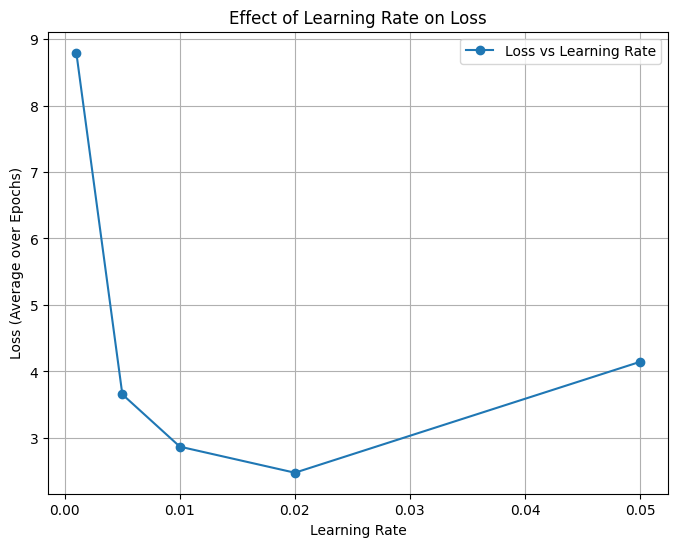

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(learning_rates, losses, marker='o', label='Loss vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Loss (Average over Epochs)')
plt.title('Effect of Learning Rate on Loss')
plt.legend()
plt.grid()
plt.show()

In [181]:
#train the miodel twith optimal lr

def train_model(model, train_loader, criterion, optimizer, epochs=100):
   
    losses = []

    # Initialize weights
    for params in model.parameters():
        if params.dim() > 1:
            nn.init.xavier_uniform_(params)

    for epoch in range(epochs):
        total_loss = 0
        model.train()  # Set the model to training mode

        for text, label in train_loader:
            if len(text) <= 0:  # Skip empty batches
                continue

            # Zero gradients
            optimizer.zero_grad()

            # Forward pass
            output = model(text)

            # Compute loss
            loss = criterion(output, label)

            # Backward pass
            loss.backward()

            # Update weights
            optimizer.step()

            # Accumulate total loss
            total_loss += loss.item()
            break  # Process only one batch per epoch for debugging

        losses.append(total_loss)
        #print(f"Epoch: {epoch+1}, Loss: {total_loss:.4f}")

    return losses


In [179]:


# Define model, criterion, optimizer, and DataLoader
criterion = nn.CrossEntropyLoss()
learning_rate = 0.02
rnnmodel =  SimpleRNN(len(vocab),dropout_rate=0.1)
optimizer = torch.optim.Adam(rnnmodel.parameters(), lr=learning_rate)

# Train the model
training_loss = train_model(rnnmodel, train_loader, criterion, optimizer, epochs=100)

Epoch: 1, Loss: 11.8121
Epoch: 2, Loss: 11.6604
Epoch: 3, Loss: 9.6811
Epoch: 4, Loss: 7.6729
Epoch: 5, Loss: 5.4510
Epoch: 6, Loss: 3.3265
Epoch: 7, Loss: 2.0236
Epoch: 8, Loss: 1.6611
Epoch: 9, Loss: 1.5678
Epoch: 10, Loss: 1.7582
Epoch: 11, Loss: 1.6568
Epoch: 12, Loss: 1.7367
Epoch: 13, Loss: 1.7035
Epoch: 14, Loss: 1.6172
Epoch: 15, Loss: 1.5862
Epoch: 16, Loss: 1.6105
Epoch: 17, Loss: 1.7306
Epoch: 18, Loss: 1.6635
Epoch: 19, Loss: 1.6531
Epoch: 20, Loss: 1.6378
Epoch: 21, Loss: 1.6477
Epoch: 22, Loss: 1.6423
Epoch: 23, Loss: 1.5780
Epoch: 24, Loss: 1.7532
Epoch: 25, Loss: 1.7362
Epoch: 26, Loss: 1.6624
Epoch: 27, Loss: 1.6418
Epoch: 28, Loss: 1.6467
Epoch: 29, Loss: 1.6410
Epoch: 30, Loss: 1.5597
Epoch: 31, Loss: 1.6021
Epoch: 32, Loss: 1.7174
Epoch: 33, Loss: 1.8209
Epoch: 34, Loss: 1.8182
Epoch: 35, Loss: 1.6639
Epoch: 36, Loss: 1.5533
Epoch: 37, Loss: 1.6496
Epoch: 38, Loss: 1.6107
Epoch: 39, Loss: 1.6553
Epoch: 40, Loss: 1.6650
Epoch: 41, Loss: 1.5841
Epoch: 42, Loss: 1.6732

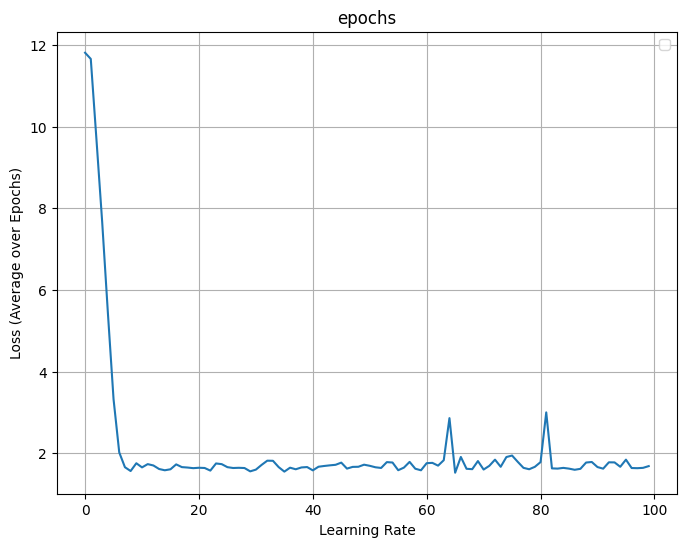

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(100), training_loss)
plt.xlabel('Learning Rate')
plt.ylabel('Loss (Average over Epochs)')
plt.title('epochs')
plt.legend()
plt.grid()
plt.show()

In [171]:
def evaluate_model(data_loader, model, dataset_name="", padding_idx=0):
    model.eval()  # Set the model to evaluation mode
    total = 0
    correct = 0

    with torch.no_grad():
        for text, label in data_loader:
            if text.size(1) == 0:  # Skip empty sequences
                continue

            # Forward pass
            predictions = model(text)  # Shape: [batch_size, vocab_size]

            # Use CrossEntropyLoss-compatible targets (not one-hot)
            _, predicted = torch.max(predictions, dim=1)  # Get the predicted class indices

            # Filter out padding tokens
            valid_indices = (label != padding_idx)  # Create a mask for non-padding indices
            valid_targets = label[valid_indices]  # Filter labels (non-padding)
            valid_predictions = predicted[valid_indices]  # Filter predictions (non-padding)

            # Skip batch if it contains no valid tokens
            if valid_targets.numel() == 0:
                continue

            # Count correct predictions and total valid samples
            correct += (valid_predictions == valid_targets).sum().item()
            total += valid_targets.size(0)

    # Compute accuracy
    accuracy = correct / total if total > 0 else 0.0
    print(f"Accuracy on {dataset_name} Data: {accuracy:.4f}")
    return accuracy

In [172]:
# Evaluate on test data
print("Evaluating on Test Data...")
test_accuracy = evaluate_model(test_loader,rnnmodel ,dataset_name="Test")

Evaluating on Test Data...
Accuracy on Test Data: 0.2338


In [173]:
#Evaluate on training data
print("Evaluating on Training Data...")
train_accuracy = evaluate_model(train_loader, model,dataset_name="Training")


Evaluating on Training Data...


Accuracy on Training Data: 0.2566


In [ ]:
#using optuna


In [182]:
# objective function
def objective(trial):
    # Hyperparameter search space
    embedding_dim = trial.suggest_int("embedding_dim", 16, 128, step=16)
    hidden_dim = trial.suggest_int("hidden_dim", 32, 128, step=32)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)  # Add dropout rate
    epochs = trial.suggest_int("epochs", 10, 50, step=10)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
    optimizer_name = trial.suggest_categorical("optimizer", ['Adam', 'SGD', 'RMSprop'])
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)

    # DataLoader setup
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    # Model initialization
    vocab_size = len(vocab)  # Assuming `vocab` is defined elsewhere
    model = SimpleRNN(vocab_size, embedding_dim=embedding_dim, hidden_dim=hidden_dim, dropout_rate=dropout_rate)

    # Loss function
    criterion = nn.CrossEntropyLoss()

    # Optimizer setup
    if optimizer_name == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_name == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:
        optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Train the model
    print(f"Training model with lr={learning_rate}, batch_size={batch_size}, optimizer={optimizer_name}, epochs={epochs}, dropout_rate={dropout_rate}")
    train_loss = train_model(model, train_loader, criterion, optimizer, epochs=epochs)

    # Evaluate the model
    accuracy = evaluate_model(test_loader, model, dataset_name="Test", padding_idx=0)

    # Return accuracy as the objective value
    return accuracy

In [183]:
import optuna

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

[I 2025-04-06 18:53:28,816] A new study created in memory with name: no-name-843a3af8-56b4-4083-9c4b-af22d5fe6f58


Training model with lr=0.009075871848258282, batch_size=64, optimizer=SGD, epochs=10, dropout_rate=0.5


[I 2025-04-06 18:53:44,395] Trial 0 finished with value: 0.23383084577114427 and parameters: {'embedding_dim': 96, 'hidden_dim': 64, 'dropout_rate': 0.5, 'epochs': 10, 'learning_rate': 0.009075871848258282, 'batch_size': 64, 'optimizer': 'SGD', 'weight_decay': 5.570860886085145e-05}. Best is trial 0 with value: 0.23383084577114427.


Accuracy on Test Data: 0.2338
Training model with lr=2.1139772468176246e-05, batch_size=128, optimizer=RMSprop, epochs=10, dropout_rate=0.1


[I 2025-04-06 18:54:22,899] Trial 1 finished with value: 0.0 and parameters: {'embedding_dim': 112, 'hidden_dim': 32, 'dropout_rate': 0.1, 'epochs': 10, 'learning_rate': 2.1139772468176246e-05, 'batch_size': 128, 'optimizer': 'RMSprop', 'weight_decay': 0.0008843023751630754}. Best is trial 0 with value: 0.23383084577114427.


Accuracy on Test Data: 0.0000
Training model with lr=0.009078018127890022, batch_size=16, optimizer=Adam, epochs=20, dropout_rate=0.30000000000000004


[I 2025-04-06 18:54:36,062] Trial 2 finished with value: 0.2835820895522388 and parameters: {'embedding_dim': 48, 'hidden_dim': 32, 'dropout_rate': 0.30000000000000004, 'epochs': 20, 'learning_rate': 0.009078018127890022, 'batch_size': 16, 'optimizer': 'Adam', 'weight_decay': 0.00025471569658140197}. Best is trial 2 with value: 0.2835820895522388.


Accuracy on Test Data: 0.2836


In [184]:
study.best_value

0.2835820895522388

In [185]:
study.best_params

{'embedding_dim': 48,
 'hidden_dim': 32,
 'dropout_rate': 0.30000000000000004,
 'epochs': 20,
 'learning_rate': 0.009078018127890022,
 'batch_size': 16,
 'optimizer': 'Adam',
 'weight_decay': 0.00025471569658140197}